In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
# load laser A

laser_A = []

with open('laser_A.txt', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        laser_A.append([float(row[0]),float(row[1])])

laser_A = (np.array(laser_A))
        
laser_B = []

with open('laser_B.txt', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        laser_B.append([float(row[0]),float(row[1])])
        
laser_B = (np.array(laser_B))
print(laser_A.shape)
print(laser_B.shape)

(360, 2)
(360, 2)


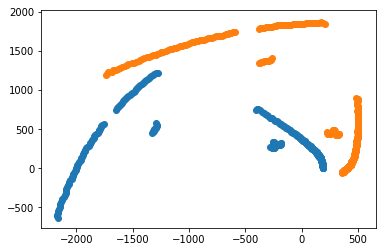

In [5]:
plt.scatter(laser_A[:,0],laser_A[:,1])
plt.scatter(laser_B[:,0],laser_B[:,1])
plt.show()

In [6]:
# transtlate A and b to centeroid
centroid_A = np.mean(laser_A, axis=0)
centroid_B = np.mean(laser_B, axis=0)

A = laser_A -centroid_A
B = laser_B - centroid_B

min_index = []
for a in A:
    distances = B-a
    gaussian_distances = np.sqrt(np.power(distances[:,0],2)+np.power(distances[:,1],2))
    min_index.append(np.argmin(gaussian_distances))
    
# rotation matrix
H = np.dot(A.T, B[min_index])
U, S, Vt = np.linalg.svd(H)
R = np.mat(np.dot(Vt.T, U.T))
# translation
t = centroid_B.T - np.dot(R,centroid_A.T)


print(R)
      
rt_laser_B = np.array(laser_B*R + t)

plt.scatter(laser_A[:,0],laser_A[:,1])
plt.scatter(rt_laser_B[:,0],rt_laser_B[:,1])
plt.show()

ValueError: operands could not be broadcast together with shapes (2,360) (360,2) 

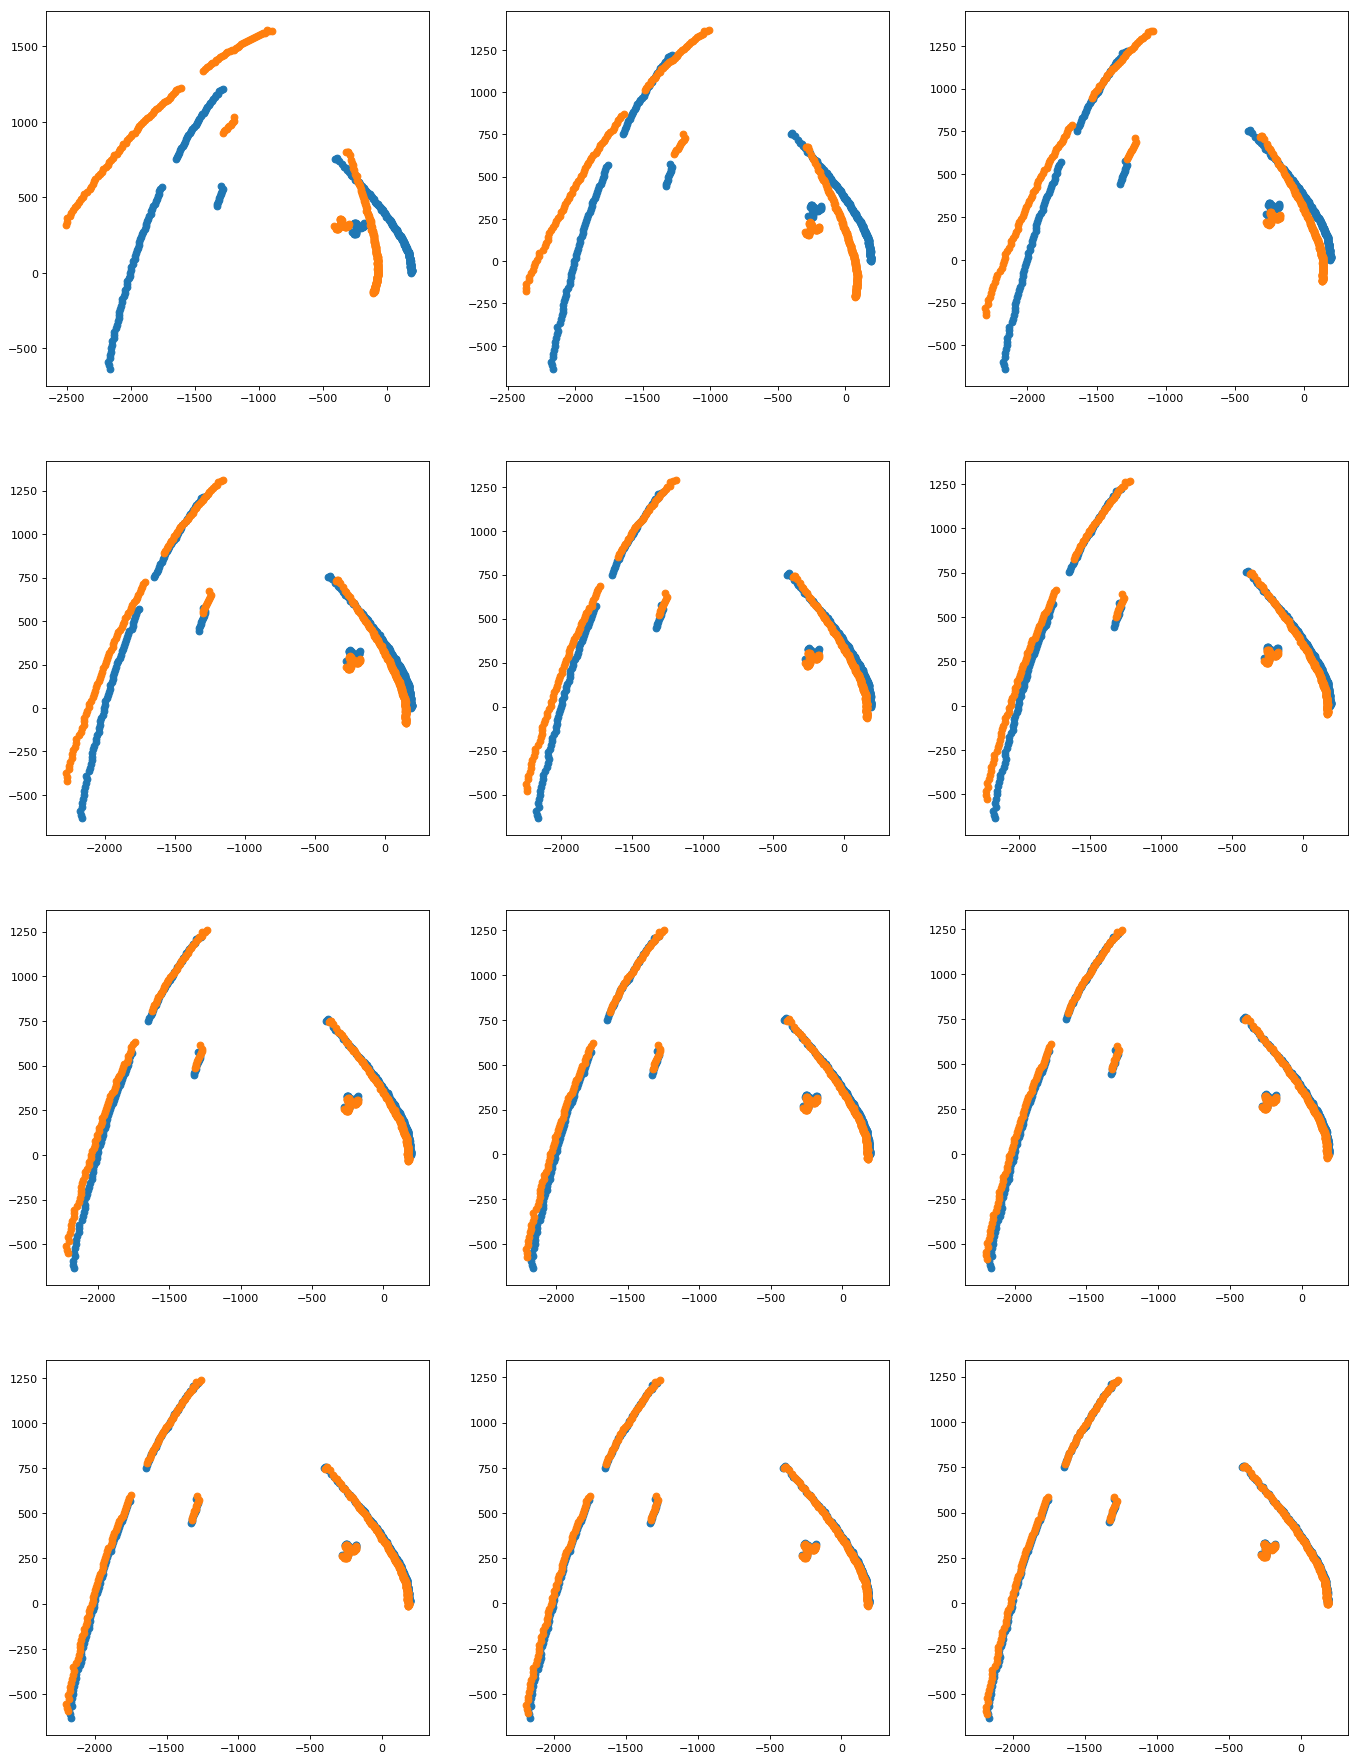

In [11]:
# real shit begins here

laser_a = laser_A
laser_b = laser_B

iteration = 12
plt.figure(figsize=(21, iteration*3), dpi= 80, facecolor='w', edgecolor='k')


for i in range(iteration):

    # transtlate A and b to centeroid
    centroid_A = np.mean(laser_a, axis=0)
    centroid_B = np.mean(laser_b, axis=0)
    A = laser_a -centroid_A
    B = laser_b - centroid_B

    min_index = []
    for a in A:
        distances = B-a
        gaussian_distances = np.sqrt(np.power(distances[:,0],2)+np.power(distances[:,1],2))
        min_index.append(np.argmin(gaussian_distances))

    # rotation matrix
    # insert magic here
    H = np.dot(A.T, B[min_index])
    U, S, Vt = np.linalg.svd(H)
    R = np.mat(np.dot(Vt.T, U.T))
    
    # translation
    # insert magic here
    t = centroid_B.T - np.dot(R,centroid_A.T)

    laser_b = np.array(laser_b*R - t)
    
    plt.subplot(int(iteration/3)+1, 3, i+1)
    plt.scatter(laser_a[:,0],laser_a[:,1])
    plt.scatter(laser_b[:,0],laser_b[:,1])

plt.show()